# Validation Basics
> This chapter focuses on the basics of model validation. From splitting data into training, validation, and testing datasets, to creating an understanding of the bias-variance tradeoff, we build the foundation for the techniques of K-Fold and Leave-One-Out validation practiced in chapter three. This is the Summary of lecture "Model Validation in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/train_test_score.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Creating train,test, and validation datasets
- Traditional train/test split
    - Seen data (used for training)
    - Unseen data (unavailable for training)
![holdout](image/holdout.png)

### Create one holdout set
Your boss has asked you to create a simple random forest model on the `tic_tac_toe` dataset. She doesn't want you to spend much time selecting parameters; rather she wants to know how well the model will perform on future data. For future Tic-Tac-Toe games, it would be nice to know if your model can predict which player will win.

In [2]:
tic_tac_toe = pd.read_csv('./dataset/tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [3]:
from sklearn.model_selection import train_test_split

# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

### Create two holdout sets
You recently created a simple random forest model to predict Tic-Tac-Toe game wins for your boss, and at her request, you did not do any parameter tuning. Unfortunately, the overall model accuracy was too low for her standards. This time around, she has asked you to focus on model performance.

Before you start testing different models and parameter sets, you will need to split the data into training, validation, and testing datasets. Remember that after splitting the data into training and testing datasets, the validation dataset is created by splitting the training dataset.

In [4]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, 
                                                  test_size=0.25, random_state=1111)

You now have training, validation, and testing datasets, but do you know when you need both validation and testing datasets?

## Accuracy metrics: regression models
- Mean absolute error (MAE)
$$ \text{MAE} = \frac{\sum_{i=1}^{n} \vert y_i - \hat{y_i} \vert}{n} $$
    - Simplest and most intuitive metric
    - Treats all points equally
    - Not sensitive to outliers
- Mean squared error (MSE)
$$ \text{MSE} = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n} $$
    - Most widely used regression metric
    - Allows outlier errors to contribute more to the overall error
    - Random family road trips could lead to large errors in predictions
- MAE vs. MSE
    - Accuracy metrics are always application apecific
    - MAE and MSE error terms are in different units and should not be compared

### Mean absolute error
Communicating modeling results can be difficult. However, most clients understand that on average, a predictive model was off by some number. This makes explaining the mean absolute error easy. For example, when predicting the number of wins for a basketball team, if you predict 42, and they end up with 40, you can easily explain that the error was two wins.

In this exercise, you are interviewing for a new position and are provided with two arrays. `y_test`, the true number of wins for all 30 NBA teams in 2017 and `predictions`, which contains a prediction for each team. To test your understanding, you are asked to both manually calculate the MAE and use `sklearn`.


In [5]:
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])

predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])

In [6]:
from sklearn.metrics import mean_absolute_error

# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

With a manual calculation, the error is 5.9
Using scikit-learn, the error is 5.9


These predictions were about six wins off on average. This isn't too bad considering NBA teams play 82 games a year. Let's see how these errors would look if you used the mean squared error instead.

### Mean squared error
Let's focus on the 2017 NBA predictions again. Every year, there are at least a couple of NBA teams that win way more games than expected. If you use the MAE, this accuracy metric does not reflect the bad predictions as much as if you use the MSE. Squaring the large errors from bad predictions will make the accuracy look worse.

In this example, NBA executives want to better predict team wins. You will use the mean squared error to calculate the prediction error. The actual wins are loaded as `y_test` and the `predictions` as predictions.

In [7]:
from sklearn.metrics import mean_squared_error

n = len(predictions)
# Finish the manual calculation of the MSE
mse_one = sum((y_test - predictions) ** 2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 49.1
Using scikit-learn, the error is 49.1


If you run any additional models, you will try to beat an MSE of 49.1, which is the average squared error of using your model. Although the MSE is not as interpretable as the MAE, it will help us select a model that has fewer 'large' errors.

### Performance on data subsets
In professional basketball, there are two conferences, the East and the West. Coaches and fans often only care about how teams in their own conference will do this year.

You have been working on an NBA prediction model and would like to determine if the predictions were better for the East or West conference. You added a third array to your data called `labels`, which contains an "E" for the East teams, and a "W" for the West. `y_test` and `predictions` have again been loaded for your use.

In [8]:
labels= np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W'])

In [9]:
from sklearn.metrics import mean_absolute_error as mae

# Find the East conference teams
east_teams = labels == 'E'

# Create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

west_teams = labels == 'W'
true_west = y_test[west_teams]
preds_west = predictions[west_teams]

# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mae(true_east, preds_east)))

# Print the west accuracy
print('The MAE for West teams is {}'.format(mae(true_west, preds_west)))

The MAE for East teams is 6.733333333333333
The MAE for West teams is 5.066666666666666


 It looks like the Western conference predictions were about two games better on average. Over the past few seasons, the Western teams have generally won the same number of games as the experts have predicted. Teams in the East are just not as predictable as those in the West.

## Classification metrics
- Types:
    - Precision
    - Recall (also called sensitivity)
    - Accuracy
    - Specificity
    - F1-score and its variations
- Confusion Matrix
    - True Positive: Predict/Actual are both 1
    - True Negative: Predict/Actual are both 0
    - False Positive: Predicted 1, actual 0
    - False Negative: Predicted 0, actual 1

### Confusion matrices
Confusion matrices are a great way to start exploring your model's accuracy. They provide the values needed to calculate a wide range of metrics, including sensitivity, specificity, and the F1-score.

You have built a classification model to predict if a person has a broken arm based on an X-ray image. On the testing set, you have the following confusion matrix:

|        |  Prediction: 0 | Prediction: 1 |
| ------ | -------------- | ------------- |
| Actual: 0 | 324 (TN) | 15 (FP) |
| Actual: 1 | 123 (FN) | 491(TP) |

In [10]:
# Calculate and print the accuracy
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision
precision = (491) / (15 + 491)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall
recall = (491) / (123 + 491)
print("The recall is {0: 0.2f}".format(recall))

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80


In this case, a true positive is a picture of an actual broken arm that was also predicted to be broken. Doctors are okay with a few additional false positives (predicted broken, not actually broken), as long as you don't miss anyone who needs immediate medical attention.

### Confusion matrices, again
Creating a confusion matrix in Python is simple. The biggest challenge will be making sure you understand the orientation of the matrix. This exercise makes sure you understand the `sklearn` implementation of confusion matrices. Here, you have created a random forest model using the `tic_tac_toe` dataset `rfc` to predict outcomes of 0 (loss) or 1 (a win) for Player One.

Note: If you read about confusion matrices on another website or for another programming language, the values might be reversed.

In [11]:
tic_tac_toe = pd.read_csv('./dataset/tic-tac-toe.csv')
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=1111)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print('the number of true positives is: {}'.format(cm[1, 1]))

[[28  2]
 [ 0 66]]
the number of true positives is: 66


Row 1, column 1 represents the number of actual 1s that were predicted 1s (the true positives). Always make sure you understand the orientation of the confusion matrix before you start using it!

### Precision vs. recall
The accuracy metrics you use to evaluate your model should always be based on the specific application. For this example, let's assume you are a really sore loser when it comes to playing Tic-Tac-Toe, but only when you are certain that you are going to win.

Choose the most appropriate accuracy metric, either precision or recall, to complete this example. But remember, if you think you are going to win, you better win!

In [14]:
from sklearn.metrics import precision_score, recall_score

test_predictions = rfc.predict(X_test)

# Create precision score based on the metric
p_score = precision_score(y_test, test_predictions)
r_score = recall_score(y_test, test_predictions)

# Print the final result
print('The precision value is {0:.2f}, The recall value is {1:.2f}'.format(p_score, r_score))

The precision value is 0.97, The recall value is 1.00


## The bias-variance tradeoff
- Variance
    - Following the training data too closely
    - Fails to generalize to the test data
    - Low training error but high test error
    - Occurs when models are overfit and have high complexity
    - High variance makes over-fitting
- Bias
    - Failing to find the relationship between the data and the response
    - High training/test error
    - Occurs when models are underfit
    - High bias makes under-fitting

### Error due to under/over-fitting
The candy dataset is prime for overfitting. With only 85 observations, if you use 20% for the testing dataset, you are losing a lot of vital data that could be used for modeling. Imagine the scenario where most of the chocolate candies ended up in the training data and very few in the holdout sample. Our model might only see that chocolate is a vital factor, but fail to find that other attributes are also important. In this exercise, you'll explore how using too many features (columns) in a random forest model can lead to overfitting.



In [15]:
candy = pd.read_csv('./dataset/candy-data.csv')

X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=2)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.88
The testing error is 9.15


In [17]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=11)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.57
The testing error is 10.05


In [18]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=4)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.60
The testing error is 8.79


### Am I underfitting?
You are creating a random forest model to predict if you will win a future game of Tic-Tac-Toe. Using the `tic_tac_toe` dataset, you have created training and testing datasets, `X_train`, `X_test`, `y_train`, and `y_test`.

You have decided to create a bunch of random forest models with varying amounts of trees (1, 2, 3, 4, 5, 10, 20, and 50). The more trees you use, the longer your random forest model will take to run. However, if you don't use enough trees, you risk underfitting. You have created a for loop to test your model at the different number of trees.

In [19]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [20]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    
    # Create predictions for the X_train and X_test datasets
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    
    # Append the accuracy score for the test and train predictions
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))
    
# Print the train and test scores
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.94, 0.93, 0.98, 0.97, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.83, 0.79, 0.89, 0.91, 0.91, 0.93, 0.97, 0.98]


Notice that with only one tree, both the train and test scores are low. As you add more trees, both errors improve. Even at 50 trees, this still might not be enough. Every time you use more trees, you achieve higher accuracy. At some point though, more trees increase training time, but do not decrease testing error.

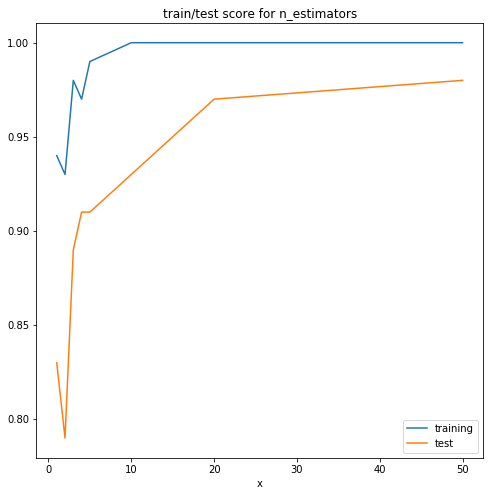

In [21]:
x = [1, 2, 3, 4, 5, 10, 20, 50]
tmp = pd.DataFrame({'x':x, 'training':train_scores, 'test':test_scores})
tmp.set_index('x', inplace=True)
tmp.plot(title='train/test score for n_estimators');